# Regression Analysis - Linear Regression with 1 variable

## Loading and Exploring Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
df = pd.read_csv('jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.shape

(9355, 12)

In [5]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [7]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

### Use a single variable is expensive-level, to predict the annual income of data science jobs at large US-based companies for full-time work.

In [9]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [28]:
df = df[df['job_title'] == 'Data Scientist']
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
295,2023,Data Scientist,Data Science and Research,USD,247600,247600,United States,3,Full-time,In-person,United States,L
296,2023,Data Scientist,Data Science and Research,USD,127300,127300,United States,3,Full-time,In-person,United States,L
563,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,1,Full-time,In-person,United States,L
838,2023,Data Scientist,Data Science and Research,USD,247600,247600,United States,3,Full-time,In-person,United States,L
839,2023,Data Scientist,Data Science and Research,USD,127300,127300,United States,3,Full-time,In-person,United States,L


In [11]:
df = df[df['company_location'] == 'United States']
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
17,2023,Data Scientist,Data Science and Research,USD,300000,300000,United States,Senior,Full-time,In-person,United States,M


In [12]:
df = df[df['company_size'] == 'L']
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
295,2023,Data Scientist,Data Science and Research,USD,247600,247600,United States,Senior,Full-time,In-person,United States,L
296,2023,Data Scientist,Data Science and Research,USD,127300,127300,United States,Senior,Full-time,In-person,United States,L
563,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Entry-level,Full-time,In-person,United States,L
838,2023,Data Scientist,Data Science and Research,USD,247600,247600,United States,Senior,Full-time,In-person,United States,L
839,2023,Data Scientist,Data Science and Research,USD,127300,127300,United States,Senior,Full-time,In-person,United States,L


In [13]:
df['experience_level'].unique()

array(['Senior', 'Entry-level', 'Mid-level'], dtype=object)

In [14]:
mymap = {'Entry-level': 1, 'Mid-level': 2, 'Senior': 3, 'Executive': 4}
df['experience_level'] = df[['experience_level']].applymap(lambda s: mymap.get(s) if s in mymap else s)

df.head()

C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_11940\330573070.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['experience_level'] = df[['experience_level']].applymap(lambda s: mymap.get(s) if s in mymap else s)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
295,2023,Data Scientist,Data Science and Research,USD,247600,247600,United States,3,Full-time,In-person,United States,L
296,2023,Data Scientist,Data Science and Research,USD,127300,127300,United States,3,Full-time,In-person,United States,L
563,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,1,Full-time,In-person,United States,L
838,2023,Data Scientist,Data Science and Research,USD,247600,247600,United States,3,Full-time,In-person,United States,L
839,2023,Data Scientist,Data Science and Research,USD,127300,127300,United States,3,Full-time,In-person,United States,L


In [15]:
linear_regression_2 = linear_model.LinearRegression()

#train the model
linear_regression_2.fit(df[['experience_level']], df['salary_in_usd'])

LinearRegression()

In [16]:
w = linear_regression_2.coef_
b = linear_regression_2.intercept_

w, b

(array([41031.43603133]), 41349.70234986945)

In [25]:
linear_regression_2.predict([[4]])

c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([205475.4464752])

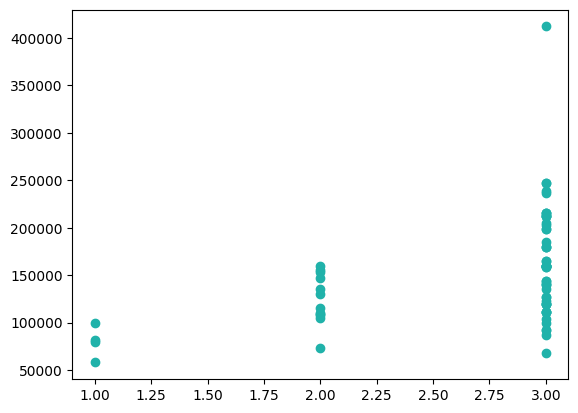

In [18]:
plt.scatter( df['experience_level'], df['salary_in_usd'], color = 'lightseagreen')

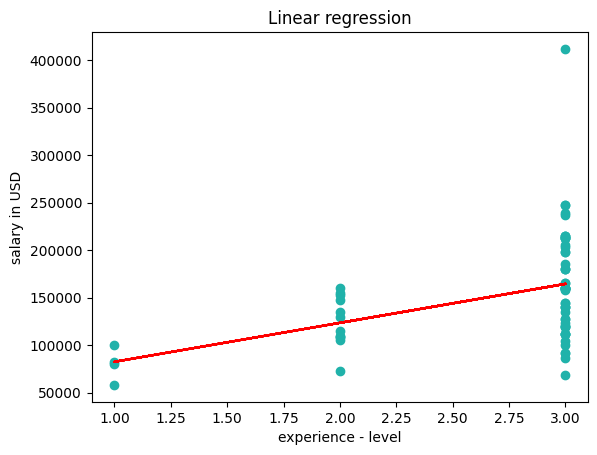

In [27]:
plt.scatter( df['experience_level'], df['salary_in_usd'], color = 'lightseagreen')
plt.xlabel("experience - level")
plt.ylabel("salary in USD")
plt.title("Linear regression")
plt.plot(df['experience_level'], w * df['experience_level'] + b, color = 'red')